In [1]:
import sys
import pandas as pd

file = open('out_mpi_merge.txt')
df = pd.DataFrame()
dict_temp = {}

for line in file:
    if ':' in line:
        if 'Processo:' in line:
            key = line.replace(':','_').split('\n')[0]
        elif 'processo' in line:
            value = line.split(':')[1].split('\n')[0]
            dict_temp[key] = value
        else:
            key = line.split(':')[0]
            value = line.split(':')[1].replace('\n','')
            dict_temp[key] = value
            
    elif 'm' in line:
        key = line.split('\t')[0]
        value = line.split('m')[1].split('s')[0].replace(',','.')
        dict_temp[key] = float(value)
        if "sys" in line:
            df = df.append(dict_temp, ignore_index=True)
            dict_temp = dict.fromkeys(dict_temp, 0)

df = df.drop(columns = ['world_rank','sys','user'])
col = df['Tempo total acumulado']
df.drop(labels=['Tempo total acumulado'], axis=1,inplace = True)
df.insert(0, 'Tempo total acumulado', col)
col = df['real']
df.drop(labels=['real'], axis=1,inplace = True)
df.insert(0, 'real', col)
col = df['Tamanho do Chunk']
df.drop(labels=['Tamanho do Chunk'], axis=1,inplace = True)
df.insert(0, 'Tamanho do Chunk', col)
col = df['Tamanho do vetor']
df.drop(labels=['Tamanho do vetor'], axis=1,inplace = True)
df.insert(0, 'Tamanho do vetor', col)
col = df['world size']
df.drop(labels=['world size'], axis=1,inplace = True)
df.insert(0, 'world size', col)
#df['world size'] = df['world size'].astype(int)
#df.sort_values('')
df = df.sort_values(['Tamanho do vetor','world size'])
df = df.reset_index()
df = df.drop(columns = 'index')

In [2]:
df[df['Tamanho do vetor'].astype(int) <= 10000]

,world size,Tamanho do vetor,Tamanho do Chunk,real,Tempo total acumulado,Processo_0,Processo_1,Processo_2,Processo_3
0,1,10,10,0.132,0.000087,0.000087,NaN,NaN,NaN
1,2,10,5,0.160,0.000345,0.000299,0.000046,NaN,NaN
2,3,10,3,0.210,0.000654,0.000533,0.000057,0.000064,NaN
3,4,10,2,0.227,0.045357,0.011344,0.011350,0.011329,0.011333
4,1,100,100,0.149,0.000068,0.000068,NaN,NaN,NaN
5,2,100,50,0.166,0.000506,0.000426,0.000080,NaN,NaN
6,3,100,33,0.185,0.000927,0.000659,0.000181,0.000087,NaN
7,4,100,25,0.276,0.005106,0.001278,0.001269,0.001279,0.001279
8,1,1000,1000,0.135,0.000420,0.000420,NaN,NaN,NaN
9,2,1000,500,0.172,0.000710,0.000351,0.000359,NaN,NaN


In [3]:
df[df['Tamanho do vetor'].astype(int) >= 10000]

,world size,Tamanho do vetor,Tamanho do Chunk,real,Tempo total acumulado,Processo_0,Processo_1,Processo_2,Processo_3
12,1,10000,10000,0.152,0.004797,0.004797,NaN,NaN,NaN
13,2,10000,5000,0.195,0.006535,0.003125,0.003410,NaN,NaN
14,3,10000,3333,0.202,0.011347,0.003644,0.003660,0.004042,NaN
15,4,10000,2500,0.233,0.063264,0.015629,0.015838,0.015958,0.015839
16,1,100000,100000,5.392,0.080363,0.080363,0,0,0
17,2,100000,50000,0.189,0.060207,0.030231,0.029977,0,0
18,3,100000,33333,0.249,0.112110,0.037247,0.037635,0.037228,0
19,4,100000,25000,0.325,0.140402,0.035109,0.035098,0.035098,0.035097
20,1,1000000,1000000,0.614,0.474702,0.474702,0,0,0
21,2,1000000,500000,1.253,0.677753,0.338866,0.338887,0,0


In [4]:
df.columns

Index(['world size', 'Tamanho do vetor', 'Tamanho do Chunk', 'real',
       'Tempo total acumulado', 'Processo_0', 'Processo_1', 'Processo_2',
       'Processo_3'],
      dtype='object')

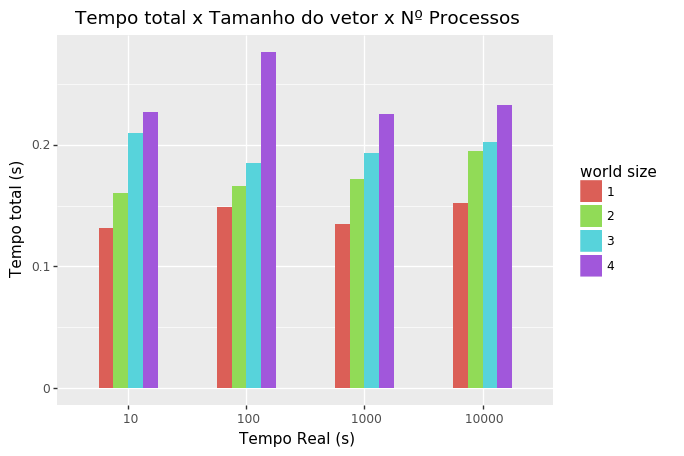

<ggplot: (-9223363297442042869)>

In [7]:
from plotnine import *

(ggplot(df[df['Tamanho do vetor'].astype(int) <= 10000], aes(x='Tamanho do vetor', y='real', fill='world size', )) +\
    geom_bar(position="dodge", stat="identity", width = 0.5) +\
    labs(x = "Tempo Real (s)",\
        y = 'Tempo total (s)',\
        title = 'Tempo total x Tamanho do vetor x Nº Processos')
)

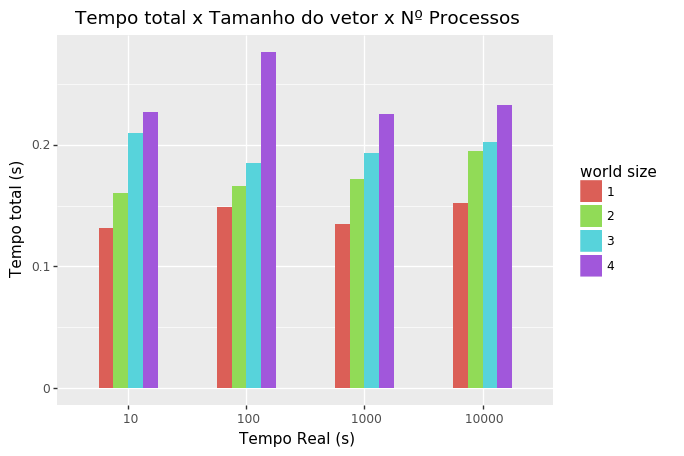

<ggplot: (-9223363297501167630)>

In [24]:
from plotnine import *

(ggplot(df[[df['Tamanho do vetor'].astype(int) > 10000] and (df['Tamanho do vetor'].astype(int) < 10001) ], aes(x='Tamanho do vetor', y='real', fill='world size', )) +\
    geom_bar(position="dodge", stat="identity", width = 0.5) +\
    labs(x = "Tempo Real (s)",\
        y = 'Tempo total (s)',\
        title = 'Tempo total x Tamanho do vetor x Nº Processos')
)

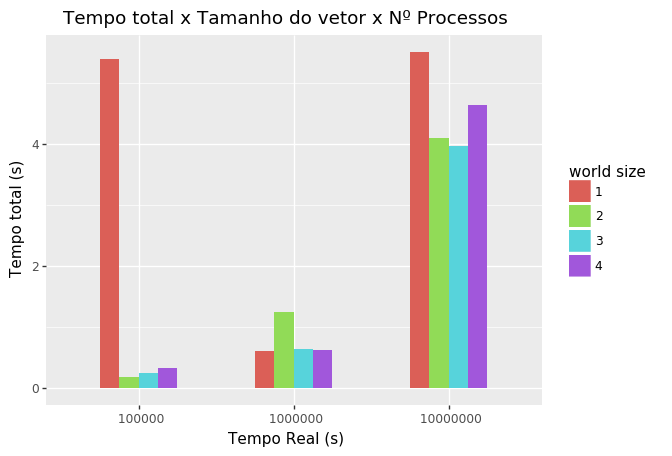

<ggplot: (-9223363297501474514)>

In [55]:
df_plot = df[df['Tamanho do vetor'].astype(int) > 10000]
df_plot = df_plot[df_plot['Tamanho do vetor'].astype(int) < 10000001]
(ggplot(df_plot, aes(x='Tamanho do vetor', y='real', fill='world size', )) +\
    geom_bar(position="dodge", stat="identity", width = 0.5) +\
    labs(x = "Tempo Real (s)",\
        y = 'Tempo total (s)',\
        title = 'Tempo total x Tamanho do vetor x Nº Processos')
)

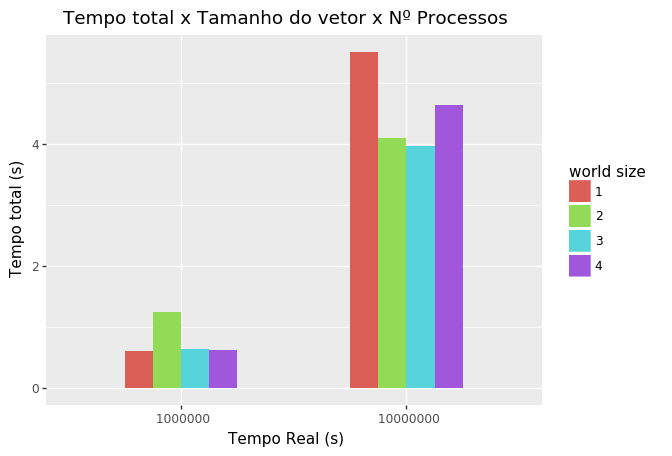

<ggplot: (8739353306786)>

In [54]:
df_plot = df[df['Tamanho do vetor'].astype(int) > 100000]
df_plot = df_plot[df_plot['Tamanho do vetor'].astype(int) < 100000000]
(ggplot(df_plot, aes(x='Tamanho do vetor', y='real', fill='world size', )) +\
    geom_bar(position="dodge", stat="identity", width = 0.5) +\
    labs(x = "Tempo Real (s)",\
        y = 'Tempo total (s)',\
        title = 'Tempo total x Tamanho do vetor x Nº Processos')
)